### Analysing the sentiment of reviews with keras

In [1]:
# Load IMDB dataset
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


17465344/17464789 [==============================] - 4s 0us/step


In [2]:
# Dictionary mapping words to index
imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [3]:
# Show first movie review
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
# Force all lists representing movie reviews to a length of 500 integers
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [5]:
# Create neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# Train neural network
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 481us/step - loss: 0.5745 - acc: 0.6502 - val_loss: 0.3048 - val_acc: 0.8703
Epoch 2/5
25000/25000 [==============================] - 12s 494us/step - loss: 0.2113 - acc: 0.9177 - val_loss: 0.2845 - val_acc: 0.8804
Epoch 3/5
25000/25000 [==============================] - 11s 446us/step - loss: 0.0693 - acc: 0.9811 - val_loss: 0.3466 - val_acc: 0.8722
Epoch 4/5
25000/25000 [==============================] - 12s 487us/step - loss: 0.0170 - acc: 0.9972 - val_loss: 0.4177 - val_acc: 0.8701
Epoch 5/5
25000/25000 [==============================] - 11s 434us/step - loss: 0.0040 - acc: 0.9996 - val_loss: 0.4719 - val_acc: 0.8700


[]

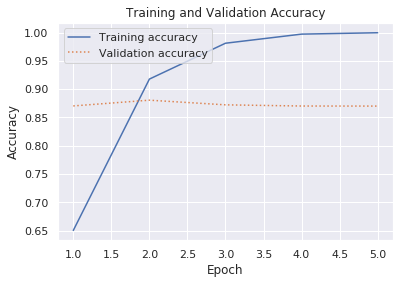

In [9]:
# Visualize the changes in training and validation accuracy as training progress
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

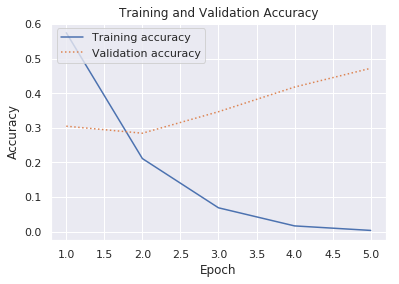

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

In [11]:
# Determine model accuracy
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.00%


In [12]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [13]:
analyze('Easily the most stellar experience I have ever had.')

0.9951048

In [14]:
analyze('The long lines and poor customer service really turned me off.')

0.07586859

In [15]:
analyze('The popcorn was stale, the soda was flat, the movie sucked.')

0.0027943235

In [16]:
analyze('Unpopular opinion, but Batman v Superman was actually pretty decent. Justice League sucked though.')

0.12984043

In [17]:
analyze('Endgame had me in my feelings')

0.96030974